In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Data= pd.read_csv('/content/gdrive/MyDrive/MSc Project/data_final.csv')

In [ ]:
Data=Data.drop('Unnamed: 0',axis=1)
Data

,Trope,Description,FemaleTokens,MaleTokens,TotalMFTokens
0,abandonedarea,abandoned places make good settings for fictio...,5.0,30.0,35.0
1,abandonedcatchphrase,catchphrases are a great and simple way to hel...,23.0,29.0,52.0
2,abandonedhospital,the creepy abandoned hospital/mental instituti...,23.0,40.0,63.0
3,abandonedmine,maybe there's nothing left to mine. maybe it w...,6.0,23.0,29.0
4,abandonedplayground,there's just something about the image of a pl...,16.0,24.0,40.0
...,...,...,...,...,...
1540,recountedbythemaincharacters,"sometimes, ""this is a true story"" is part of t...",109.0,728.0,837.0
1541,bythepowerofgreyskull,lots of phlebotinum is voice activated: kirk t...,178.0,966.0,1144.0
1542,crouchingniceguyhiddenjerkass,you meet someone you think is a really nice gu...,760.0,1003.0,1763.0
1543,narroweditdowntotheguyirecognise,big-name actors tend to get major roles in med...,583.0,2109.0,2692.0


##Create NLP Pipeline - NLTK


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Sentance Tokenization
Sentance_tokenized= Data['Description'].apply(lambda x: nltk.sent_tokenize(x))
Sentance_tokenized

0       [abandoned places make good settings for ficti...
1       [catchphrases are a great and simple way to he...
2       [the creepy abandoned hospital/mental institut...
3       [maybe there's nothing left to mine., maybe it...
4       [there's just something about the image of a p...
                              ...                        
1540    [sometimes, "this is a true story" is part of ...
1541    [lots of phlebotinum is voice activated: kirk ...
1542    [you meet someone you think is a really nice g...
1543    [big-name actors tend to get major roles in me...
1544    [you're being given an award, but not for some...
Name: Description, Length: 1545, dtype: object

In [ ]:
Word_tokenized=Data['Description'].apply(lambda x: nltk.word_tokenize(x))
Word_tokenized

0       [abandoned, places, make, good, settings, for,...
1       [catchphrases, are, a, great, and, simple, way...
2       [the, creepy, abandoned, hospital/mental, inst...
3       [maybe, there, 's, nothing, left, to, mine, .,...
4       [there, 's, just, something, about, the, image...
                              ...                        
1540    [sometimes, ,, ``, this, is, a, true, story, '...
1541    [lots, of, phlebotinum, is, voice, activated, ...
1542    [you, meet, someone, you, think, is, a, really...
1543    [big-name, actors, tend, to, get, major, roles...
1544    [you, 're, being, given, an, award, ,, but, no...
Name: Description, Length: 1545, dtype: object

##Frequency Distribution of Words after word tokenization

In [ ]:
from nltk.probability import FreqDist
freq_dist_of_words = Word_tokenized.apply(lambda x: FreqDist(x))
print(freq_dist_of_words)

0       {'abandoned': 9, 'places': 2, 'make': 1, 'good...
1       {'catchphrases': 2, 'are': 1, 'a': 8, 'great':...
2       {'the': 21, 'creepy': 2, 'abandoned': 8, 'hosp...
3       {'maybe': 5, 'there': 3, ''s': 1, 'nothing': 2...
4       {'there': 1, ''s': 2, 'just': 3, 'something': ...
                              ...                        
1540    {'sometimes': 2, ',': 23, '``': 1, 'this': 7, ...
1541    {'lots': 1, 'of': 12, 'phlebotinum': 1, 'is': ...
1542    {'you': 5, 'meet': 2, 'someone': 5, 'think': 1...
1543    {'big-name': 4, 'actors': 2, 'tend': 1, 'to': ...
1544    {'you': 4, ''re': 3, 'being': 1, 'given': 1, '...
Name: Description, Length: 1545, dtype: object


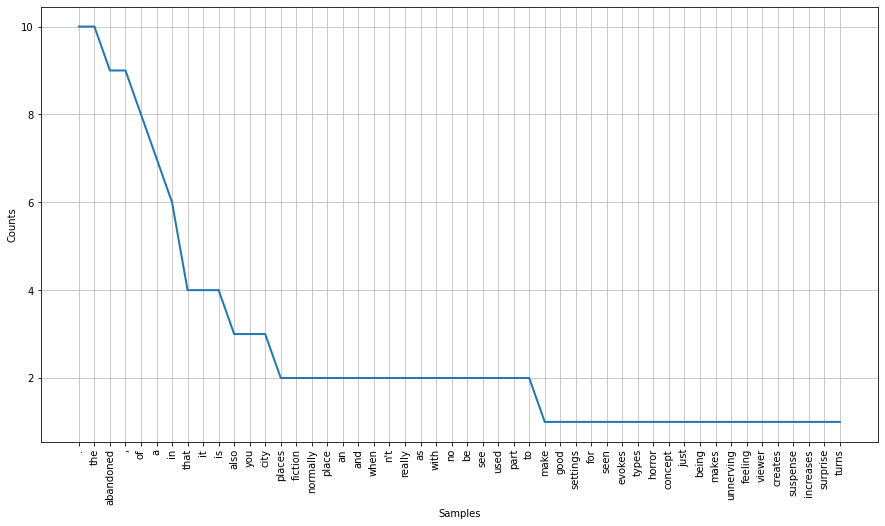

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(freq_dist_of_words)
frq_dist=freq_dist_of_words.iloc[0]

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
frq_dist.plot(50,cumulative=False) #frequency distribution of first 50 word tokens for the first trope
plt.show()

In [ ]:
frq_dist.most_common(5)

[('.', 10), ('the', 10), ('abandoned', 9), (',', 9), ('of', 8)]

##Stopwords and Punctuations are Removed 

In [ ]:
from nltk.corpus import stopwords
from string import punctuation
stop=stopwords.words('english')
punctuation=list(punctuation)

punct= list(["'","''","``","..."]) #There are missing punctuations. so added more 
punct1=punctuation+ punct
punct1
stop


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
cleaned_token=[]
cleaned_token1=[]
for doc in (Word_tokenized):
    cleaned_token1.append([(token) for token in doc if token not in (stop)])
for doc1 in (cleaned_token1):
    cleaned_token.append([(token1) for token1 in doc1 if token1 not in (punct1)])


##Stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmed= PorterStemmer()
Stemmed_token=[]
for token_clean in cleaned_token:
  Stemmed_token.append([(stemmed.stem(token2)) for token2 in token_clean])



##Lemmatization

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer=WordNetLemmatizer()
Token_lemmatized=[]
for token1 in (Stemmed_token):
  Token_lemmatized.append([lemmatizer.lemmatize(token) for token in token1])
#Token_lemmatized

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def tokenizer(x):
  #X is a list of tokens
  return x
def get_top_ngram(tokenized_corpus, ngram_range, top_n):
  vec= CountVectorizer(ngram_range=ngram_range,max_features=top_n,max_df=0.5,min_df=10,lowercase=False,tokenizer=tokenizer)
  BoW=vec.fit_transform(tokenized_corpus) #Bag of Words created
  sum_words = BoW.sum(axis=0) 
    # get the words with their frequencies and order them
  words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return BoW, words_freq

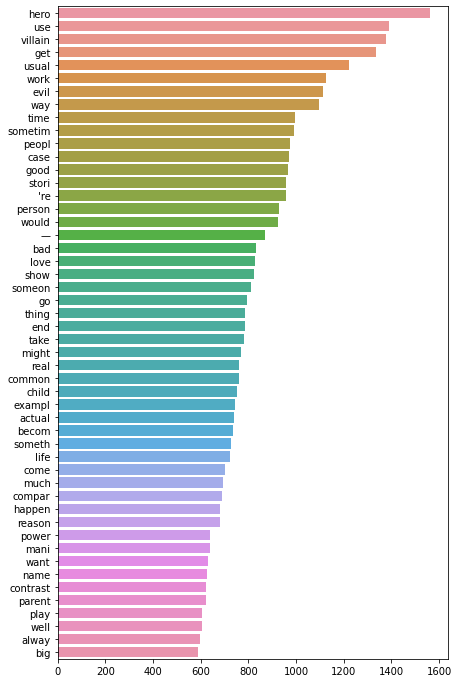

In [ ]:
# let's get the words frequencies
BoW, words_freq= get_top_ngram(Token_lemmatized, ngram_range=(1,2), top_n= 50)

# let's plot them
import seaborn as sns
import matplotlib.pyplot as plt

# separate the n_grams from their frequencies
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
sns.barplot(x=ngram_freqs,y=ngram_labels)


In [ ]:
freq_table=pd.DataFrame(ngram_freqs,ngram_labels)
freq_table.head(10)

,0
hero,1560
use,1389
villain,1376
get,1334
usual,1224
work,1124
evil,1114
way,1098
time,995
sometim,993


In [ ]:
def tokenizer(x):
  #X is a list of tokens
  return x
def Bag_of_Words(spacy_tokenized_corpus, ngram_range):
  vec= CountVectorizer(ngram_range=ngram_range,max_df=0.5,min_df=10,lowercase=False,tokenizer=tokenizer).fit(spacy_tokenized_corpus)
  BoW=vec.transform(spacy_tokenized_corpus) #Bag of Words created
  return BoW


BoW= Bag_of_Words(Token_lemmatized, ngram_range=(1,1))#unigrams

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
  Count_Bag_of_Words_Model=pd.DataFrame(BoW.toarray())
  Count_Bag_of_Words_Model

,0,1,2,3,4,5,6,7,8,9,...,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1542,0,0,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,1,0
1543,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer(x):
  #X is a list of tokens
  return x
def get_top_ngram1(tokenized_corpus, ngram_range, top_n):
  vec1= TfidfVectorizer(ngram_range=ngram_range,max_features=top_n,max_df=0.5,min_df=10,lowercase=False,tokenizer=tokenizer)
  BoW1=vec1.fit_transform(tokenized_corpus) #Bag of Words created
  sum_words = BoW1.sum(axis=0) 
    # get the words with their frequencies and order them
  words_freq1 = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
  words_freq1 =sorted(words_freq1, key = lambda x: x[1], reverse=True)
  return BoW1, words_freq1 #[:10]

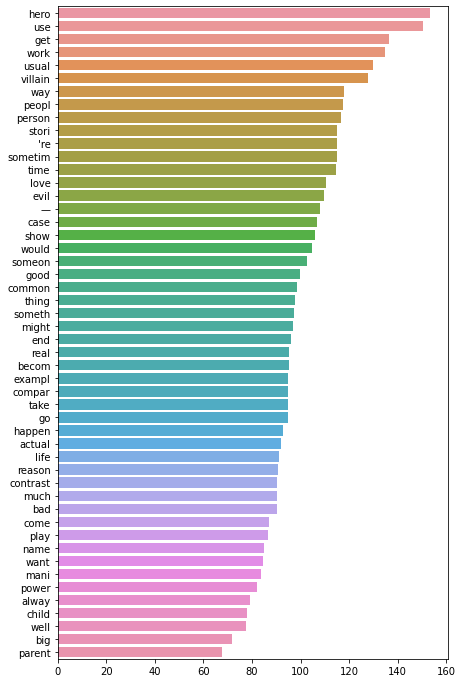

In [ ]:
# let's get the words frequencies
BoW1, words_freq1= get_top_ngram1(Token_lemmatized, ngram_range=(1,2), top_n= 50)

# let's plot them
import seaborn as sns
import matplotlib.pyplot as plt

# separate the n_grams from their frequencies
ngram_labels1 = [word1[0] for word1 in words_freq1]
ngram_freqs1 = [word1[1] for word1 in words_freq1]
plt.figure(figsize=(7,12))
sns.barplot(x=ngram_freqs1,y=ngram_labels1)


In [ ]:
freq_table1=pd.DataFrame(ngram_freqs1,ngram_labels1)
freq_table1.head(10)

,0
hero,153.090674
use,150.359570
get,136.337918
work,134.838288
usual,129.938608
villain,127.885143
way,117.880308
peopl,117.554106
person,116.615172
stori,114.954099


In [ ]:
def tokenizer(x):
  #X is a list of tokens
  return x
def get_top_ngram1(tokenized_corpus, ngram_range):
  vec1= TfidfVectorizer(ngram_range=ngram_range,max_df=0.5,min_df=10,lowercase=False,tokenizer=tokenizer)
  BoW1=vec1.fit_transform(tokenized_corpus) #Bag of Words created
  return BoW1

BoW1= get_top_ngram1(Token_lemmatized, ngram_range=(1,1))


In [ ]:
TFIDF_Bag_of_Words_Model=pd.DataFrame(BoW1.toarray())
TFIDF_Bag_of_Words_Model

,0,1,2,3,4,5,6,7,8,9,...,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146
0,0.0,0.0,0.000000,0.0,0.000000,0.058505,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.087398,0.0,...,0.000000,0.071418,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1541,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.049786,0.0
1542,0.0,0.0,0.023162,0.0,0.000000,0.025589,0.0,0.0,0.000000,0.0,...,0.032017,0.032114,0.034475,0.0,0.0,0.0,0.0,0.0,0.017911,0.0
1543,0.0,0.0,0.055771,0.0,0.039552,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


##Word Embedding with Word2Vec

In [ ]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# Gensim Libraries
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [ ]:
model_cbow = Word2Vec(sentences=Token_lemmatized,min_count=20, workers=4, window =5)#continous bag of words model

In [ ]:
#pre-trained model from google
path = '/content/gdrive/MyDrive/MSc Project/GoogleNews-vectors-negative300.bin.gz'
wv = KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
wv.most_similar('hero')

[('heroes', 0.7713842391967773),
 ('heros', 0.6476413607597351),
 ('idol', 0.583287239074707),
 ('villain', 0.5617582201957703),
 ('heroic', 0.5593931078910828),
 ('cult_hero', 0.556943953037262),
 ('warrior', 0.5568825006484985),
 ('folk_hero', 0.55190509557724),
 ('Hero', 0.5432050824165344),
 ('savior', 0.5411152839660645)]

In [ ]:
wv.most_similar('male') 

[('female', 0.8405333161354065),
 ('males', 0.7579616904258728),
 ('females', 0.7030535936355591),
 ('accomplice_Hudgens', 0.6375256776809692),
 ('Male', 0.6288970112800598),
 ('Gestapo_massacred', 0.5981300473213196),
 ('Female', 0.5971192121505737),
 ('femal', 0.5850157141685486),
 ('DBCP_pesticide_scientists', 0.5709491968154907),
 ("#'##_#'##_tall", 0.5576428174972534)]

In [ ]:
wv.most_similar(positive=['man','love'], negative=['villain'], topn = 3)

[('woman', 0.5286833047866821),
 ('boy', 0.4625566303730011),
 ('teenager', 0.4539988934993744)]

##Create Document Vectors Using Word2Vec Word Embedding

In [ ]:
def vectorize(token_processed, model):
    features = []

    for doc in token_processed:# here we get each document in token_lemmatized
        zero_vector = np.zeros(model.vector_size) #Return a new array of given shape and type, filled with zeros. 
        #this step is just to create an empty array with size of the model
        vectors = []
        for token in doc: # here we are taking tokens from individual document
            if token in wv:
                try:
                    vectors.append(wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors) #here vectors are converted to array. If vectors are not converted to array this error will appear" 'list' object has no attribute 'mean'""
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector) #zero vector is array is created to give zero to the features if it doesnt have term inside.
    return features
    
vectorized_docs = vectorize(Token_lemmatized, model=wv)
len(vectorized_docs), len(vectorized_docs[0])

(1545, 300)

In [ ]:
Vectorized_data=pd.DataFrame(vectorized_docs)
Vectorized_data

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.019966,0.058617,0.011868,0.124246,-0.116725,0.011130,0.035293,-0.031757,0.073574,0.057159,...,-0.082207,0.103183,-0.079643,0.011572,-0.065713,-0.049231,0.012581,-0.009401,0.037528,0.015912
1,0.024087,0.021741,0.000412,0.141022,-0.096595,0.045049,0.066516,-0.037093,0.084106,0.043288,...,-0.037890,0.084417,-0.063799,-0.007285,-0.076304,-0.050337,0.007312,-0.039988,-0.005219,0.022901
2,0.013208,0.068033,0.022892,0.100768,-0.089417,0.041660,0.052526,-0.059549,0.061817,0.051142,...,-0.069100,0.070913,-0.092254,0.025611,-0.059241,-0.020947,-0.015194,-0.018016,0.039013,0.015899
3,0.011264,0.009298,0.046295,0.166156,-0.055618,0.042765,0.034410,-0.067143,0.120331,0.030846,...,-0.041220,0.056126,-0.134735,0.033791,-0.071311,-0.070324,-0.002496,-0.028302,0.019748,0.030109
4,0.040722,0.067260,-0.011501,0.104774,-0.103320,0.021442,0.089683,-0.049919,0.081704,0.071266,...,-0.088902,0.073860,-0.061772,-0.012751,-0.036209,-0.036697,0.009416,-0.048605,0.014253,-0.007351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0.058869,0.006285,0.001483,0.109037,-0.059455,0.061032,0.076927,-0.033967,0.083089,0.052050,...,-0.036795,0.032079,-0.068337,-0.008615,-0.034509,-0.052833,0.021167,-0.058930,-0.013715,0.004874
1541,0.082994,0.056073,0.020600,0.096895,-0.101311,0.039713,0.060048,-0.075128,0.077627,0.043344,...,-0.037842,0.045233,-0.056893,-0.046090,-0.041667,-0.082167,0.030681,-0.080138,-0.004006,0.012585
1542,0.067095,0.044209,-0.031779,0.097630,-0.078323,0.060163,0.046845,-0.027126,0.062103,0.074456,...,-0.046629,0.060329,-0.093488,0.021479,-0.047992,-0.037272,0.032709,-0.034503,0.006056,0.029430
1543,0.074530,0.027748,-0.043301,0.070104,-0.064964,0.049232,0.058209,-0.047679,0.102052,0.071346,...,-0.042996,0.015341,-0.048409,-0.030012,-0.036952,0.014145,-0.000429,-0.035874,0.057853,-0.022272


In [ ]:
from sklearn.preprocessing import StandardScaler
standarized_data = StandardScaler().fit_transform(vectorized_docs)

In [ ]:
Vector_data=pd.DataFrame(standarized_data)
Vector_data

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-3.054815,1.278586,0.234761,1.192561,-1.749537,-1.196541,-1.372786,0.627321,-0.169173,-0.468889,...,-1.926592,2.218390,-0.033368,0.301090,-0.637662,-0.913274,0.482150,1.887308,1.308733,-0.034050
1,-1.158079,-0.573418,-0.281299,2.036483,-0.937545,0.108163,-0.004418,0.396960,0.297482,-1.127649,...,-0.068056,1.396335,0.682570,-0.454748,-1.098807,-0.960139,0.251258,0.505659,-0.739504,0.290424
2,-1.626462,1.751483,0.731397,0.011486,-0.647986,-0.022216,-0.617542,-0.572357,-0.690056,-0.754627,...,-1.376905,0.804738,-0.603254,0.863785,-0.355859,0.285053,-0.735028,1.498168,1.379899,-0.034656
3,-1.710162,-1.198348,1.785726,3.300866,0.715369,0.020292,-1.411515,-0.900154,1.902403,-1.718536,...,-0.207699,0.156983,-2.522830,1.191661,-0.881424,-1.806961,-0.178573,1.033532,0.456804,0.625072
4,-0.441845,1.712655,-0.817994,0.213013,-1.208818,-0.799878,1.010948,-0.156662,0.191062,0.201058,...,-2.207360,0.933847,0.774173,-0.673837,0.646976,-0.382252,0.343470,0.116381,0.193543,-1.114022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0.339489,-1.349678,-0.233053,0.427486,0.560597,0.722971,0.451874,0.531925,0.252407,-0.711541,...,-0.022102,-0.896411,0.477495,-0.508042,0.720980,-1.065886,0.858456,-0.350003,-1.146545,-0.546450
1541,1.378169,1.150815,0.628175,-0.183311,-1.127779,-0.097093,-0.287855,-1.244850,0.010419,-1.124961,...,-0.066021,-0.320197,0.994620,-2.010120,0.409324,-2.308702,1.275377,-1.308027,-0.681365,-0.188480
1542,0.693639,0.555000,-1.731543,-0.146332,-0.200499,0.689519,-0.866537,0.827192,-0.677385,0.352537,...,-0.434524,0.341112,-0.659006,0.698163,0.133940,-0.406598,1.364257,0.753413,-0.199253,0.593535
1543,1.013768,-0.271711,-2.250591,-1.531067,0.338356,0.269065,-0.368475,-0.059969,1.092556,0.204877,...,-0.282189,-1.629607,1.377998,-1.365686,0.614621,1.771817,-0.087971,0.691478,2.282641,-1.806714


##Vector Data to Pairwise Distance

In [ ]:
from sklearn.metrics import pairwise_distances
pairwise_distance=pairwise_distances(Vector_data, metric='cosine')
pairwise_distance

array([[0.00000000e+00, 6.79303721e-01, 6.04020368e-01, ...,
        1.19265138e+00, 1.14054917e+00, 1.05758536e+00],
       [6.79303721e-01, 2.22044605e-16, 8.77424779e-01, ...,
        1.15615730e+00, 1.06398708e+00, 1.04180785e+00],
       [6.04020368e-01, 8.77424779e-01, 0.00000000e+00, ...,
        1.15661977e+00, 1.10848372e+00, 1.08737274e+00],
       ...,
       [1.19265138e+00, 1.15615730e+00, 1.15661977e+00, ...,
        6.66133815e-16, 1.03833901e+00, 1.02056338e+00],
       [1.14054917e+00, 1.06398708e+00, 1.10848372e+00, ...,
        1.03833901e+00, 2.22044605e-16, 8.60095756e-01],
       [1.05758536e+00, 1.04180785e+00, 1.08737274e+00, ...,
        1.02056338e+00, 8.60095756e-01, 6.66133815e-16]])

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(perplexity=30)  #perplexity= number of neighborhood points
# X_embedded_word2vec = tsne.fit_transform(pairwise_distance)


In [ ]:
# X_embedded_word2vec

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
X_embedded_word2vec=pd.read_csv('/content/gdrive/MyDrive/MSc Project/X_embedded_word2vec.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
X_embedded_word2vec=X_embedded_word2vec.drop('Unnamed: 0',axis=1)
X_embedded_word2vec=np.asarray(X_embedded_word2vec)
X_embedded_word2vec

array([[-39.449814,  10.036604],
       [-39.646603,  11.542392],
       [-10.058185,  -8.39315 ],
       ...,
       [ 22.938585, -25.658932],
       [-24.003792,  44.675964],
       [-26.695183, -25.854725]])

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/MSc Project/X_embedded_word2vec.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   X_embedded_word2vec.to_csv(f)

Text(0, 0.5, 'Distance')

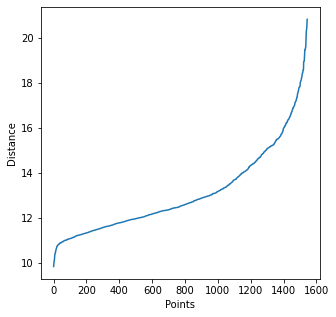

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=100)
neighbors = nearest_neighbors.fit(X_embedded_word2vec)

distances, indices = neighbors.kneighbors(X_embedded_word2vec)
distances = np.sort(distances[:,99], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

14.746096511728565


<Figure size 360x360 with 0 Axes>

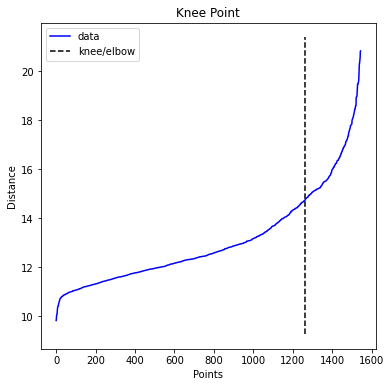

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])
Epsilon_Value=[]
Epsilon=distances[knee.knee]
Epsilon_Value.append(Epsilon)

In [ ]:
#Import DBSCAN library from sklearn.cluster
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_word2vec)
cluster=clustering.labels_
cluster
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Noise=[]
Estimated_Clusters=[]
Estimated_Clusters_with_noise=[]
Estimated_Clusters.append(no_clusters_)
Estimated_Noise.append(no_noise)

Estimated number of clusters: 1
Estimated number of noise: 0


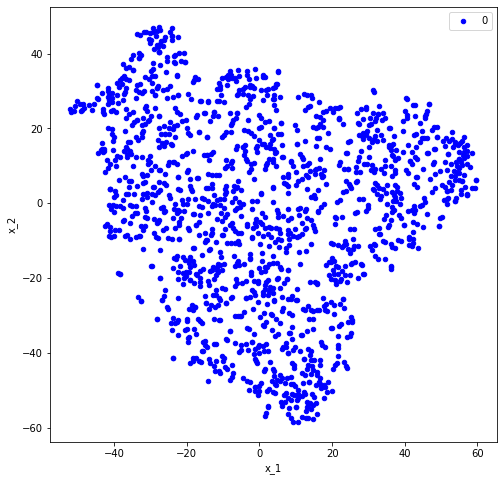

In [ ]:
def show_clusters(X_embedded, cluster):
  df = pd.DataFrame(dict(x=X_embedded[:,0], y=X_embedded[:,1], label=cluster))
  colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow',4:'black',5:'orange',6:'brown',7:'pink'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_word2vec, cluster)

In [ ]:
Silhouette_Score=[]
from sklearn import metrics
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
#print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, cluster))
Silhouette_Score.append(0)

1


In [ ]:
Epsilon=12.5
Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_word2vec)
cluster=clustering.labels_
cluster_main=cluster
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Clusters.append(no_clusters_)
Estimated_Noise.append(no_noise)

Estimated number of clusters: 2
Estimated number of noise: 11


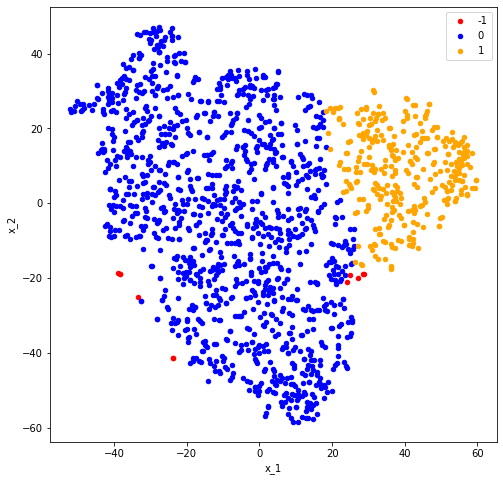

In [ ]:
def show_clusters(X_embedded, cluster):
  df = pd.DataFrame(dict(x=X_embedded[:,0], y=X_embedded[:,1], label=cluster))
  colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow',4:'black',5:'orange',6:'brown',7:'pink'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_word2vec, cluster)

In [ ]:
from sklearn import metrics
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_word2vec, cluster))
Silhouette_Score.append(metrics.silhouette_score(X_embedded_word2vec, cluster))

2
Silhouette Coefficient: 0.155


In [ ]:
Epsilon=14.5
Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_word2vec)
cluster=clustering.labels_
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Clusters.append(no_clusters_)
Estimated_Noise.append(no_noise)

Estimated number of clusters: 1
Estimated number of noise: 0


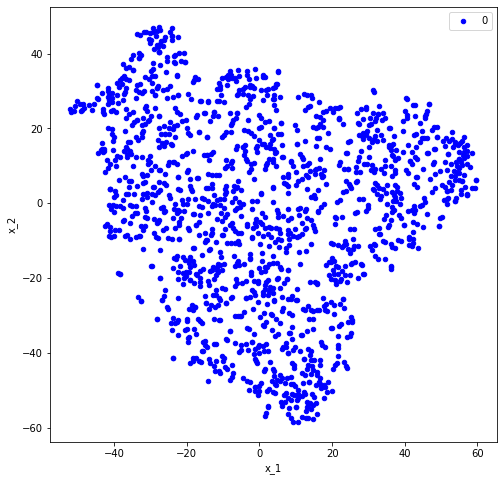

In [ ]:
def show_clusters(X_embedded, cluster):
  df = pd.DataFrame(dict(x=X_embedded[:,0], y=X_embedded[:,1], label=cluster))
  colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow',4:'black',5:'orange',6:'brown',7:'pink'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_word2vec, cluster)

In [ ]:

n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
#print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_word2vec, cluster))
Silhouette_Score.append(0)

1


In [ ]:
Epsilon=6
Epsilon_Value.append(Epsilon)
clustering = DBSCAN(eps=Epsilon, min_samples=100).fit(X_embedded_word2vec)
cluster=clustering.labels_
cluster
no_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print('Estimated number of clusters: %d' % no_clusters_)
no_noise=np.sum(np.array(cluster)==-1,axis=0)
print('Estimated number of noise: %d' % no_noise)
Estimated_Clusters.append(no_clusters_)
Estimated_Noise.append(no_noise)

Estimated number of clusters: 0
Estimated number of noise: 1545


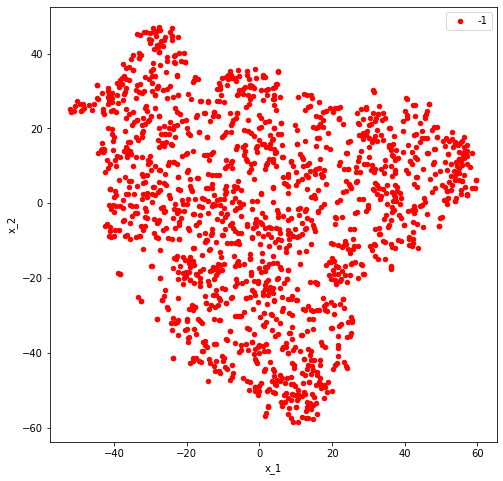

In [ ]:
def show_clusters(X_embedded, cluster):
  df = pd.DataFrame(dict(x=X_embedded[:,0], y=X_embedded[:,1], label=cluster))
  colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow',4:'black',5:'orange',6:'brown',7:'pink'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X_embedded_word2vec, cluster)

In [ ]:
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
#print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_countvectorizer, cluster))
Silhouette_Score.append(0)

0


In [ ]:
data_count_word2vec = {'Epsilon': Epsilon_Value,'Minimum Samples':[100,100,100,100],'Number of Clusters without Noise': Estimated_Clusters_with_noise,
                   'Number of Noise': Estimated_Noise,'Number of Clusters without Noise':Estimated_Clusters,'Silhouette Score':Silhouette_Score,'Number of Neighbors in KNN': [100,100,100,100]}
DBSCAN_Count_word2vec = pd.DataFrame(data_count_word2vec)
DBSCAN_Count_word2vec


,Epsilon,Minimum Samples,Number of Clusters without Noise,Number of Noise,Silhouette Score,Number of Neighbors in KNN
0,14.746097,100,1,0,0.000000,100
1,12.500000,100,2,11,0.155265,100
2,14.500000,100,1,0,0.000000,100
3,6.000000,100,0,1545,0.000000,100


In [ ]:
#Compare the Male and Female Tokens and Assign 0 and 1 (Male=0 and Female =1)
conditions = [Data['FemaleTokens'] > Data['MaleTokens'], 
              Data['FemaleTokens'] < Data['MaleTokens']]
choices = ['1', '0']
Data['Token_Labels'] = np.select(conditions, choices, default='Noise')
Data_cluster_=Data.copy()
Data_cluster_['Cluster_Labels']=cluster_main
Data_cluster_.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens'],axis=1)

,Trope,Token_Labels,Cluster_Labels
0,abandonedarea,0,0
1,abandonedcatchphrase,0,0
2,abandonedhospital,0,0
3,abandonedmine,0,0
4,abandonedplayground,0,0
...,...,...,...
1540,recountedbythemaincharacters,0,0
1541,bythepowerofgreyskull,0,0
1542,crouchingniceguyhiddenjerkass,0,0
1543,narroweditdowntotheguyirecognise,0,0


In [ ]:
print(Data_cluster_['Token_Labels'].value_counts())
print(Data_cluster_['Cluster_Labels'].value_counts())

0        1361
1         181
Noise       3
Name: Token_Labels, dtype: int64
 0    1216
 1     318
-1      11
Name: Cluster_Labels, dtype: int64


In [ ]:
Data_cluster_1 = Data_cluster_[Data_cluster_.Cluster_Labels != -1]

In [ ]:
#female gendered tropes
Data_cluster_female = Data_cluster_1[Data_cluster_1.Cluster_Labels != 0]
Data_cluster_female.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
5,abandonedwarchild,1
9,abandonthedisabled,1
13,abhorrentadmirer,1
26,aboyagirlandababyfamily,1
27,aboyandhisx,1
...,...,...
1528,sexequalsdeath,1
1530,parentchildincest,1
1535,evilstepmother,1
1536,cleansupnicely,1


In [ ]:
#Male gendered tropes
Data_cluster_male = Data_cluster_1[Data_cluster_1.Cluster_Labels != 1]
Data_cluster_male.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
0,abandonedarea,0
1,abandonedcatchphrase,0
2,abandonedhospital,0
3,abandonedmine,0
4,abandonedplayground,0
...,...,...
1540,recountedbythemaincharacters,0
1541,bythepowerofgreyskull,0
1542,crouchingniceguyhiddenjerkass,0
1543,narroweditdowntotheguyirecognise,0


In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340277 sha256=f687984052c4d1da4a0d3fbd92a7aa7a3093503c8d1652b770b9763d2106c105
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=100,min_samples=2).fit(X_embedded_word2vec)
labels = clusterer.labels_
cluster_main=labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise=np.sum(np.array(labels)==-1,axis=0)
print('Estimated number of noise: %d' % n_noise)

Estimated number of clusters: 2
Estimated number of noise: 21


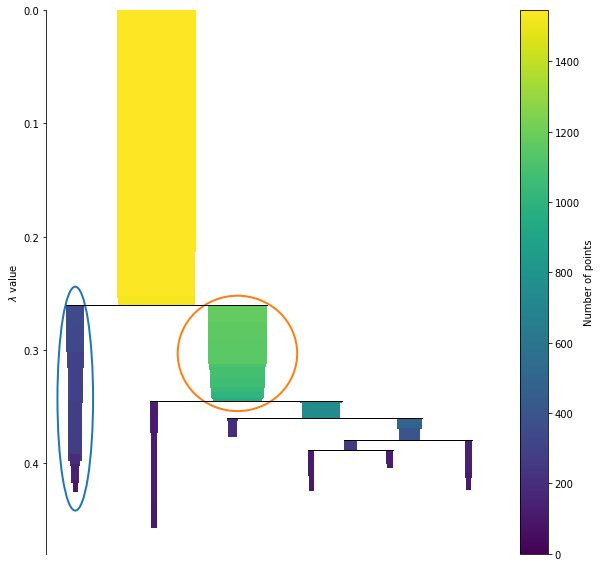

In [ ]:
plt.figure(figsize=(10,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_embedded_word2vec, labels))

2
Silhouette Coefficient: 0.150


In [ ]:
#Compare the Male and Female Tokens and Assign 0 and 1 (Male=0 and Female =1)
conditions = [Data['FemaleTokens'] > Data['MaleTokens'], 
              Data['FemaleTokens'] < Data['MaleTokens']]
choices = ['0', '1']
Data['Token_Labels'] = np.select(conditions, choices, default='Noise')
Data_cluster_=Data.copy()
Data_cluster_['Cluster_Labels']=cluster_main
Data_cluster_.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens'],axis=1)

,Trope,Token_Labels,Cluster_Labels
0,abandonedarea,1,1
1,abandonedcatchphrase,1,1
2,abandonedhospital,1,1
3,abandonedmine,1,1
4,abandonedplayground,1,1
...,...,...,...
1540,recountedbythemaincharacters,1,1
1541,bythepowerofgreyskull,1,1
1542,crouchingniceguyhiddenjerkass,1,1
1543,narroweditdowntotheguyirecognise,1,1


In [ ]:
print(Data_cluster_['Token_Labels'].value_counts())
print(Data_cluster_['Cluster_Labels'].value_counts())

1        1361
0         181
Noise       3
Name: Token_Labels, dtype: int64
 1    1174
 0     350
-1      21
Name: Cluster_Labels, dtype: int64


In [ ]:
Data_cluster_1 = Data_cluster_[Data_cluster_.Cluster_Labels != -1]

In [ ]:
#male gendered tropes
Data_cluster_female = Data_cluster_1[Data_cluster_1.Cluster_Labels != 0]
Data_cluster_female.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
0,abandonedarea,1
1,abandonedcatchphrase,1
2,abandonedhospital,1
3,abandonedmine,1
4,abandonedplayground,1
...,...,...
1540,recountedbythemaincharacters,1
1541,bythepowerofgreyskull,1
1542,crouchingniceguyhiddenjerkass,1
1543,narroweditdowntotheguyirecognise,1


In [ ]:
#female gendered tropes
Data_cluster_male = Data_cluster_1[Data_cluster_1.Cluster_Labels != 1]
Data_cluster_male.drop(['Description','FemaleTokens','MaleTokens','TotalMFTokens','Token_Labels'],axis=1)

,Trope,Cluster_Labels
5,abandonedwarchild,0
9,abandonthedisabled,0
11,abdicatethethrone,0
13,abhorrentadmirer,0
24,abovethegods,0
...,...,...
1528,sexequalsdeath,0
1530,parentchildincest,0
1533,evilregent,0
1535,evilstepmother,0
